<span style="color: green; font-size: 25px;">                          Final Assignment</span>

<span style="color: blue; font-size: 18px;">Importing Necessary Libraries</span>


In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [3]:
data = pd.read_csv("mutagenicity_kNN.csv")

In [4]:
data

Unnamed: 0    Id          CAS  \
0              0     1     100-00-5   
1              1     2     100-01-6   
2              2     3     100-02-7   
3              3     4     100-11-8   
4              4     5     100-12-9   
...          ...   ...          ...   
5759        5759  5767   20395-16-8   
5760        5760  5768   34718-47-3   
5761        5761  5769   43204-63-3   
5762        5762  5770   52583-35-4   
5763        5763  5771  188021-38-7   

                                                 SMILES    Status  \
0                              O=[N+]([O-])c1ccc(cc1)Cl  Training   
1                               O=[N+]([O-])c1ccc(N)cc1  Training   
2                               O=[N+]([O-])c1ccc(O)cc1  Training   
3                             O=[N+]([O-])c1ccc(cc1)CBr  Training   
4                              O=[N+]([O-])c1ccc(cc1)CC  Training   
...                                                 ...       ...   
5759               O=C1N(C(=O)N(C(=O)N1CC=C)CC2OC2)CC=C  Training   
5760                                 O=C(C(Br)(Br)Br)Cl  Training   
5761                                        N(CCBr)CCBr  Training   
5762  N#Cc2cc(cc(c2(N=Nc1ccc(cc1(NC(=O)C))N(CCOC)CCO...  Training   
5763                     O(c1c(cc(cc1Br)C)C(C)(C)C)CC=C  Training   

      Experimental value Predicted value  NumValenceElectrons       qed  \
0                      1               1                   52  0.463602   
1                      1               1                   52  0.359544   
2                      0               1                   52  0.470728   
3                      1               0                   58  0.432586   
4                      0               0                   58  0.479785   
...                  ...             ...                  ...       ...   
5759                   1               0                  102  0.485090   
5760                   1               1                   42  0.495987   
5761                   1               1                   44  0.568556   
5762                   1               1                  184  0.264581   
5763                   1               0                   88  0.735392   

        TPSA     MolMR  BalabanJ      BertzCT    MolWt  MolLogP  
0      43.14   38.1064  3.003401   244.429658  157.556  2.24820  
1      69.16   37.5088  3.003401   242.429658  138.126  1.17700  
2      63.37   34.7612  3.003401   241.674771  139.110  1.30040  
3      43.14   45.7274  2.913802   257.648013  216.034  2.48970  
4      43.14   42.4744  2.913802   253.299498  151.165  2.15720  
...      ...       ...       ...          ...      ...      ...  
5759   78.53   69.3560  2.668492   627.435628  265.269 -1.05750  
5760   17.07   40.3720  3.791118    85.425922  315.186  2.59030  
5761   12.03   40.4577  2.447473    28.870765  230.931  1.36580  
5762  185.59  125.3525  2.552977  1169.342047  485.457  3.84768  
5763    9.23   73.2710  3.263016   388.457194  283.209  4.61982  

[5764 rows x 15 columns]

In [6]:
data.head()

Unnamed: 0  Id       CAS                     SMILES    Status  \
0           0   1  100-00-5   O=[N+]([O-])c1ccc(cc1)Cl  Training   
1           1   2  100-01-6    O=[N+]([O-])c1ccc(N)cc1  Training   
2           2   3  100-02-7    O=[N+]([O-])c1ccc(O)cc1  Training   
3           3   4  100-11-8  O=[N+]([O-])c1ccc(cc1)CBr  Training   
4           4   5  100-12-9   O=[N+]([O-])c1ccc(cc1)CC  Training   

   Experimental value Predicted value  NumValenceElectrons       qed   TPSA  \
0                   1               1                   52  0.463602  43.14   
1                   1               1                   52  0.359544  69.16   
2                   0               1                   52  0.470728  63.37   
3                   1               0                   58  0.432586  43.14   
4                   0               0                   58  0.479785  43.14   

     MolMR  BalabanJ     BertzCT    MolWt  MolLogP  
0  38.1064  3.003401  244.429658  157.556   2.2482  
1  37.5088  3.003401  242.429658  138.126   1.1770  
2  34.7612  3.003401  241.674771  139.110   1.3004  
3  45.7274  2.913802  257.648013  216.034   2.4897  
4  42.4744  2.913802  253.299498  151.165   2.1572

**Inspect data**



In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5764 entries, 0 to 5763
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           5764 non-null   int64  
 1   Id                   5764 non-null   int64  
 2   CAS                  5764 non-null   object 
 3   SMILES               5764 non-null   object 
 4   Status               5764 non-null   object 
 5   Experimental value   5764 non-null   int64  
 6   Predicted value      5764 non-null   object 
 7   NumValenceElectrons  5764 non-null   int64  
 8   qed                  5764 non-null   float64
 9   TPSA                 5764 non-null   float64
 10  MolMR                5764 non-null   float64
 11  BalabanJ             5764 non-null   float64
 12  BertzCT              5764 non-null   float64
 13  MolWt                5764 non-null   float64
 14  MolLogP              5764 non-null   float64
dtypes: float64(7), int64(4), object(4)
mem

In [13]:
data.isnull().sum()

Unnamed: 0             0
Id                     0
CAS                    0
SMILES                 0
Status                 0
Experimental value     0
Predicted value        0
NumValenceElectrons    0
qed                    0
TPSA                   0
MolMR                  0
BalabanJ               0
BertzCT                0
MolWt                  0
MolLogP                0
dtype: int64

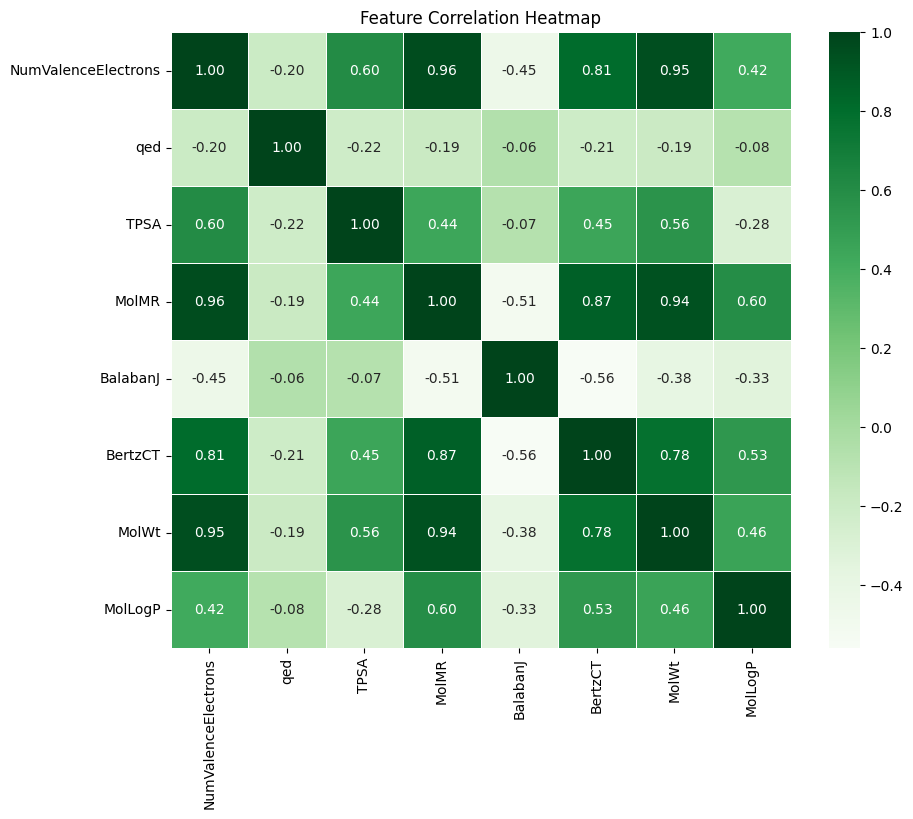

In [37]:
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap="Greens", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [16]:
features = ['NumValenceElectrons', 'qed', 'TPSA', 'MolMR', 'BalabanJ', 'BertzCT', 'MolWt', 'MolLogP']
target = 'Experimental value'
X = df[features]
y = df[target]

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [22]:
param_grid = {'n_neighbors': range(1, 21), 'metric': ['euclidean', 'manhattan', 'minkowski']}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': range(1, 21)},
             scoring='f1')

In [23]:
best_k = grid_search.best_params_['n_neighbors']
best_metric = grid_search.best_params_['metric']
print(f"Best k: {best_k}, Best metric: {best_metric}")


Best k: 17, Best metric: manhattan


In [24]:
knn_best = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)
knn_best.fit(X_train, y_train)


KNeighborsClassifier(metric='manhattan', n_neighbors=17)

In [27]:
y_pred = knn_best.predict(X_test)


In [28]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [30]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.7086
Precision: 0.7343
Recall: 0.7569
F1-score: 0.7455


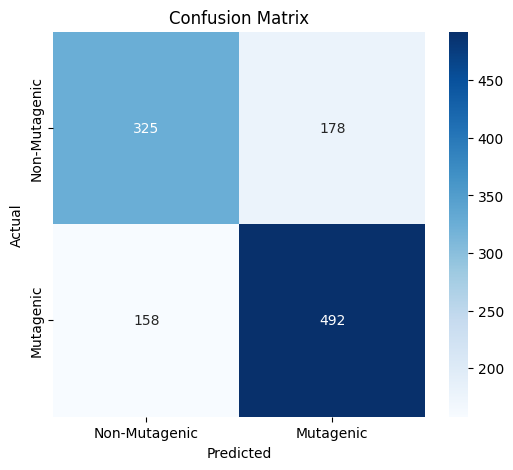

In [41]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Mutagenic', 'Mutagenic'], yticklabels=['Non-Mutagenic', 'Mutagenic'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()